In [1]:
import sys
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%run -i {os.path.join(os.getcwd(), '..', 'src', 'data', 'make_dataset.py')}

###Loading data step###
C:\Users\andrey.starodumov\Desktop\uni\PMLDL\Assignments\Assignment_01\assig\src\data\..\..\data\external
100% [........................................................................] 44376072 / 44376072###Splitting data into samples step###
Reading the full data...
Reconstructing the full data...
Splitting the full data on test and train...
Splitting the train data on val and train...
Saving the train file...
Saving the test file...
Saving the validation file...
Ready


In [2]:
sys.path.insert(0, os.path.join(os.getcwd(), '..', 'src', 'data'))

In [3]:
from make_dataset import LDataset, PDataset

# Downloading the file

In [5]:
data_load = LDataset()

In [6]:
data_load.load_data()

C:\Users\andrey.starodumov\Desktop\uni\PMLDL\Assignments\Assignment_01\assig\src\data\..\..\data\external
100% [........................................................................] 44376072 / 44376072

In [6]:
data_load.unzip_data()

# Creating the split


In [4]:
data_read = PDataset()

In [6]:
data_read.split_files()

Reading the full data...
Reconstructing the full data...
Splitting the full data on test and train...
Splitting the train data on val and train...
Saving the train file...
Saving the test file...
Saving the validation file...
Ready


# Explore

In [9]:
data = data_read.read_data()

In [10]:
data

,reference,translation,similarity,lenght_diff,ref_tox,trn_tox
0,"If Alkar is flooding her with psychic waste, t...","if Alkar floods her with her mental waste, it ...",0.785171,0.010309,0.014195,0.981983
1,Now you're getting nasty.,you're becoming disgusting.,0.749687,0.071429,0.065473,0.999039
2,"Well, we could spare your life, for one.","well, we can spare your life.",0.919051,0.268293,0.213313,0.985068
3,"Ah! Monkey, you've got to snap out of it.","monkey, you have to wake up.",0.664333,0.309524,0.053362,0.994215
4,I've got orders to put her down.,I have orders to kill her.,0.726639,0.181818,0.009402,0.999348
...,...,...,...,...,...,...
577772,You didn't know that Estelle had stolen some f...,you didn't know that Estelle stole your fish f...,0.870322,0.030769,0.000121,0.949143
577773,It'il suck the life out of you!,you'd be sucked out of your life!,0.722897,0.058824,0.996124,0.215794
577774,"I can't fuckin' take that, bruv.",I really can't take this.,0.617511,0.212121,0.984538,0.000049
577775,They called me a fucking hero. The truth is I ...,"they said I was a hero, but I didn't care.",0.679613,0.358209,0.991945,0.000124


In [8]:
# Check if all reference or translation are toxic or not
print(f"Translation toxity is greater that reference one in {len(data[data['ref_tox'] < data['trn_tox']]) / len(data)}%")

Translation toxity is greater that reference one in 0.4476381025897535%


It means that we do not need to consider the translation as a neutral one

In [14]:
row = data[data['ref_tox'] > data['trn_tox']]
pd.DataFrame(
                    row[['reference', 'translation', 'ref_tox', 'trn_tox', 'similarity']].values,
                    columns=['toxic_sentence', 'neutral_sentence', 'toxic_tox', 'neutral_tox', 'similarity']
                )

,toxic_sentence,neutral_sentence,toxic_tox,neutral_tox,similarity
0,I'm not gonna have a child... ...with the same...,I'm not going to breed kids with a genetic dis...,0.950956,0.035846,0.703185
1,"They're all laughing at us, so we'll kick your...",they're laughing at us. We'll show you.,0.999492,0.000131,0.618866
2,Maine was very short on black people back then.,there wasn't much black in Maine then.,0.96368,0.14871,0.720482
3,"So now their spirits are cursed, walking back ...","their souls are cursed, they guard the paths, ...",0.842509,0.143992,0.755883
4,"Come on, Cal, leave that shit alone.","come on, Cal, put it down.",0.999637,0.000279,0.660481
...,...,...,...,...,...
319137,I am so crazy nuts about you guys.,I'm so crazy about you guys.,0.973442,0.000709,0.934512
319138,"I thought American men were bad enough, but no...","an American man is worth nothing, but for you,...",0.999624,0.035941,0.671444
319139,It'il suck the life out of you!,you'd be sucked out of your life!,0.996124,0.215794,0.722897
319140,"I can't fuckin' take that, bruv.",I really can't take this.,0.984538,0.000049,0.617511


# Getting pictures

In [30]:
def save_figure(ax, ax_title, png_name, xlim=None):
    ax.set_title(ax_title)
    if xlim is not None:
        ax.set_xlim(*xlim)
    plt.savefig(f'{png_name}.png')

### Similarity (to check the similarity with paraphrasing)

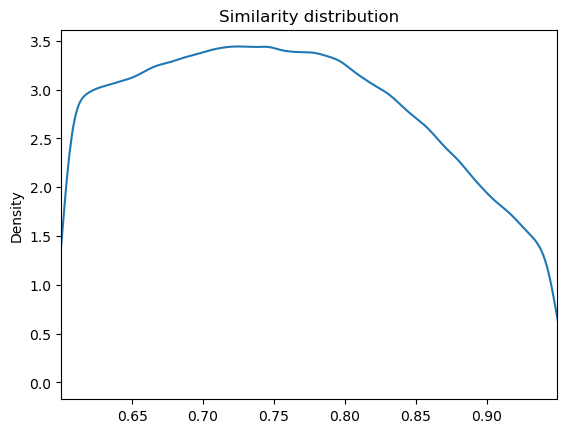

In [32]:
save_figure(data['similarity'].plot(kind='kde'),
            'Similarity distribution',
            png_name='similarity_distribution',
            xlim=[min(data['similarity']), max(data['similarity'])])

In [19]:
min(data['similarity']), max(data['similarity'])

(0.600001424605, 0.949999790681)

### Check the distribution of the max toxity

In [33]:
data['max_tox'] = data[["ref_tox", "trn_tox"]].max(axis=1)
data['min_tox'] = data[["ref_tox", "trn_tox"]].min(axis=1)

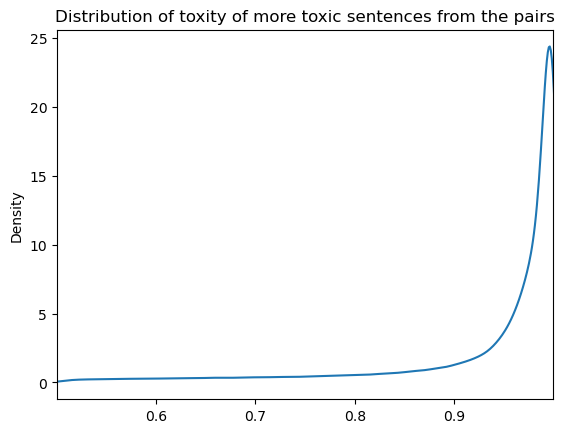

In [34]:
save_figure(data['max_tox'].plot(kind='kde'),
            'Distribution of toxity of more toxic sentences from the pairs',
            png_name='tox_tox_distribution',
            xlim=[min(data['max_tox']), max(data['max_tox'])])

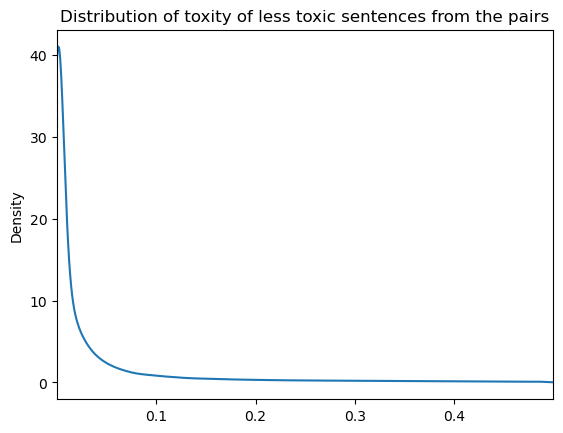

In [35]:
save_figure(data['min_tox'].plot(kind='kde'),
            'Distribution of toxity of less toxic sentences from the pairs',
            png_name='neutral_tox_distribution',
            xlim=[min(data['min_tox']), max(data['min_tox'])])

<Axes: ylabel='Density'>

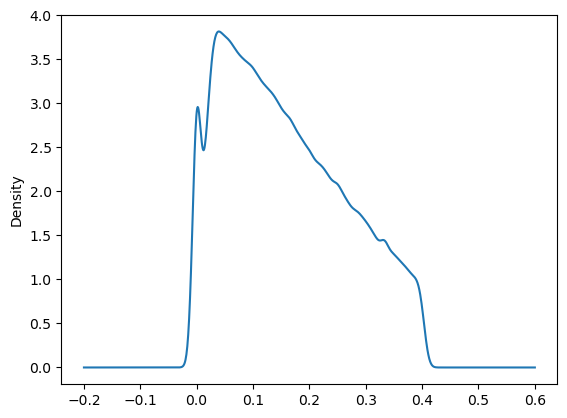

In [36]:
data['lenght_diff'].plot(kind='kde')